In [134]:
import pandas as pd
from qiskit import *

In [135]:
# CONSTANT
index = 452758

In [136]:
# display information
def prepare_comparison():
    
    x_col = []
    mod_col = []
    x_bin_col = []
    mod_bin_col = []
    
    for x in range(0, 16):
        x_col.append(x)
        mod = (x + index) % 16
        mod_col.append(mod)
        x_bin_col.append("{0:b}".format(x).zfill(4))
        mod_bin_col.append("{0:b}".format(mod).zfill(4))
    
    data_source_dict = {'x': x_col, 'mod': mod_col, 'x_bin': x_bin_col, 'mod_bin': mod_bin_col}
    comparison_df = pd.DataFrame(data_source_dict)
    
    return comparison_df

In [137]:
comparison_df = prepare_comparison()

In [138]:
# prepare input by iterating over x binary from the least significant
def prepare_input(circ, x):
    x_bin = "{0:b}".format(x).zfill(4)
    
    i = 0
    for b in x_bin[::-1]:
        circ.reset(i)
        if b == '1':
            circ.x(i)
        i = i + 1
    # barrier after prepared input
    circ.barrier()

In [139]:
def F(x):
    circ = QuantumCircuit(4, 4)
    prepare_input(circ, x)
    
    # manipulations
    
    # first bit no changing at all
    
    # second bit negation
    circ.x(1)
    # third bit
    circ.cx(1, 2) # second from the right of mod_bin XOR third from the right of x_bin
    # fourth bit
    circ.ccx(1, 2, 3) # !(fourth from the right of x_bin XOR (second from the right of mod bin AND third from the right of mod bin))
    circ.x(3)
    
    # measures
    circ.barrier()
    circ.measure(0, 0)
    circ.measure(1, 1)
    circ.measure(2, 2)
    circ.measure(3, 3)

    backend = Aer.get_backend('qasm_simulator')
    job = execute(circ, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    # info
    display('Input: {}'.format(comparison_df.loc[(comparison_df['x'] == x), 'x_bin'].iloc[0]))
    display('Expected: {}'.format(comparison_df.loc[(comparison_df['x'] == x), 'mod_bin'].iloc[0]))
    display('Output: {}'.format(output))
    
    # graphical
    display(circ.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'}))
    print('\n')


In [140]:
def summary():
    for i in range(0, 16):
        F(i)

,x,mod,x_bin,mod_bin
0,0,6,0000,0110
1,1,7,0001,0111
2,2,8,0010,1000
3,3,9,0011,1001
4,4,10,0100,1010
5,5,11,0101,1011
6,6,12,0110,1100
7,7,13,0111,1101
8,8,14,1000,1110
9,9,15,1001,1111


'Input: 0000'

'Expected: 0110'

'Output: 0110'

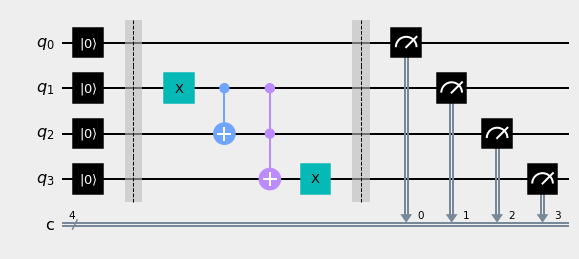

'Input: 0001'

'Expected: 0111'

'Output: 0111'

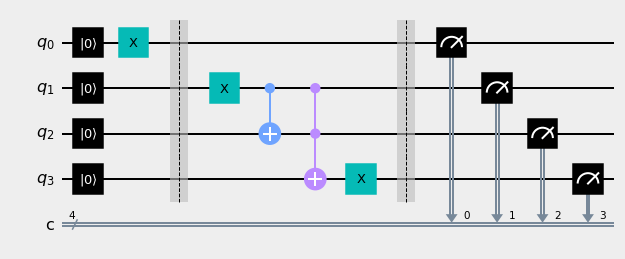

'Input: 0010'

'Expected: 1000'

'Output: 1000'

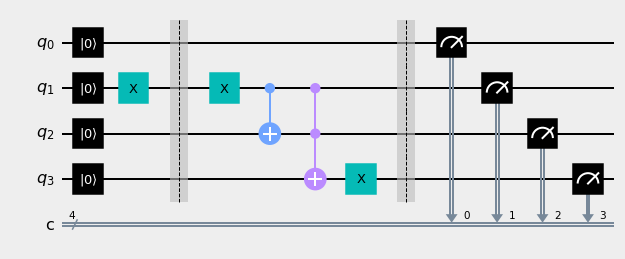

'Input: 0011'

'Expected: 1001'

'Output: 1001'

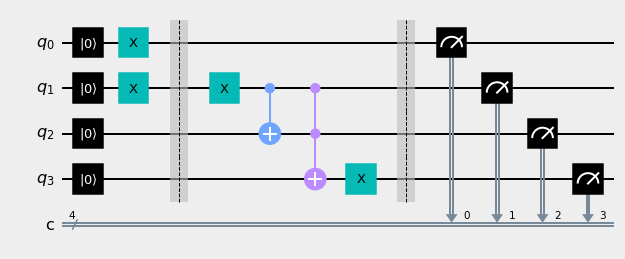

'Input: 0100'

'Expected: 1010'

'Output: 1010'

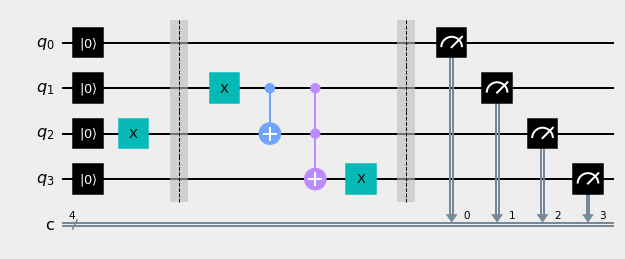

'Input: 0101'

'Expected: 1011'

'Output: 1011'

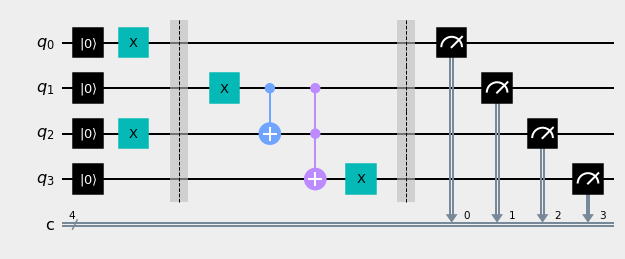

'Input: 0110'

'Expected: 1100'

'Output: 1100'

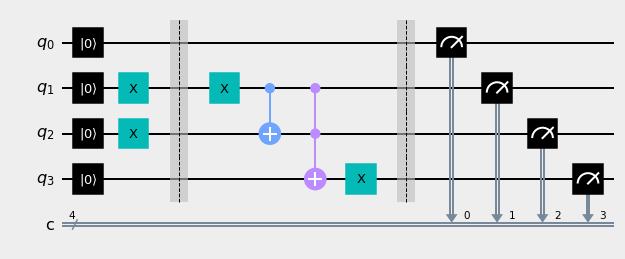

'Input: 0111'

'Expected: 1101'

'Output: 1101'

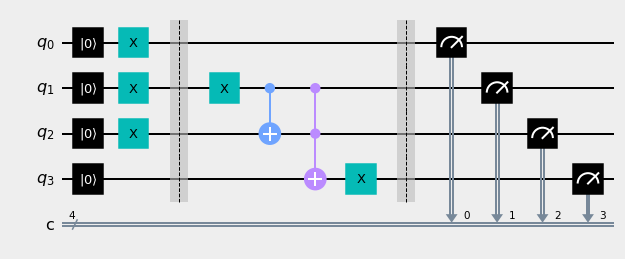

'Input: 1000'

'Expected: 1110'

'Output: 1110'

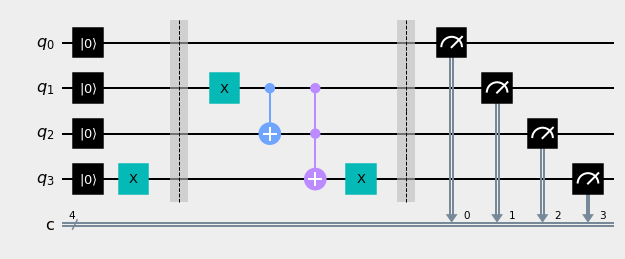

'Input: 1001'

'Expected: 1111'

'Output: 1111'

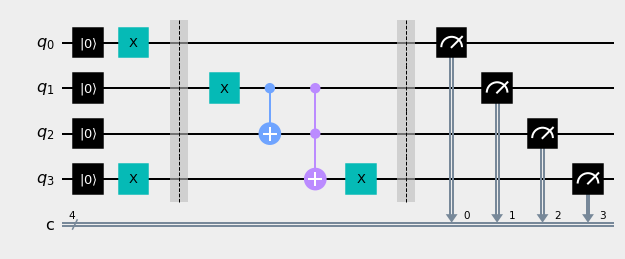

'Input: 1010'

'Expected: 0000'

'Output: 0000'

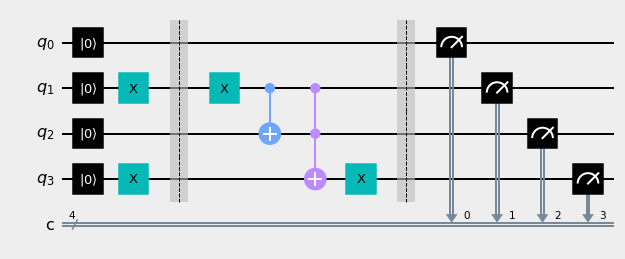

'Input: 1011'

'Expected: 0001'

'Output: 0001'

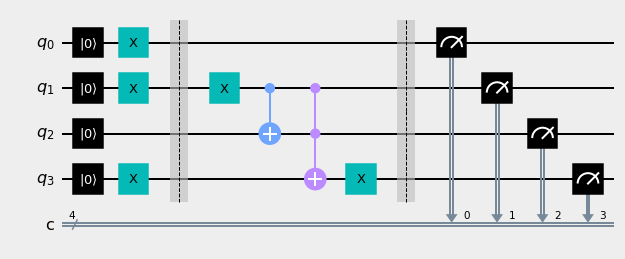

'Input: 1100'

'Expected: 0010'

'Output: 0010'

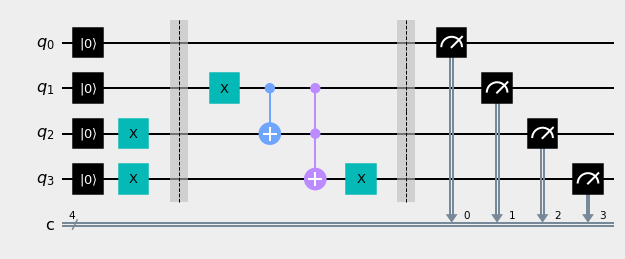

'Input: 1101'

'Expected: 0011'

'Output: 0011'

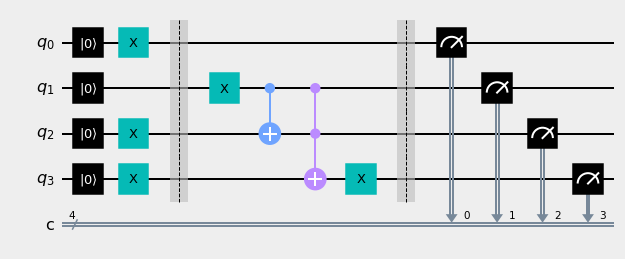

'Input: 1110'

'Expected: 0100'

'Output: 0100'

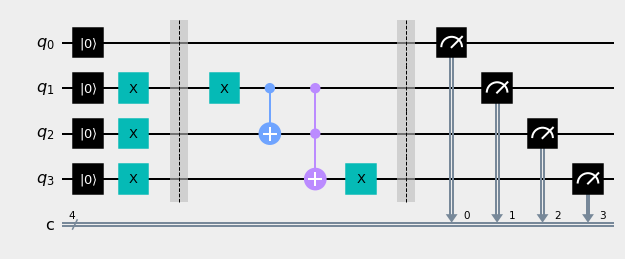

'Input: 1111'

'Expected: 0101'

'Output: 0101'

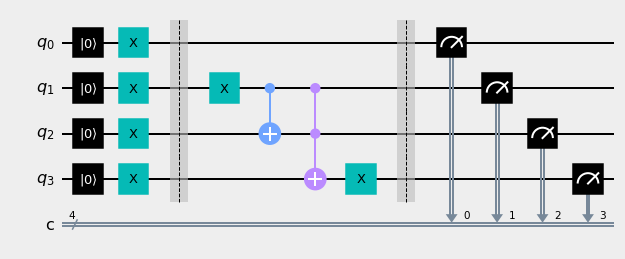

In [141]:
display(comparison_df)
print('\n')
summary()